## SOC 210B Assignment 2
_M. Nolan Gray_

In [7]:
# prep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
dtafile = './Data/covid.dta'
df = pd.read_stata(dtafile)
df.sample(5)

,iso_code,location,total_deaths_per_million,total_vaccinations_per_hundred,median_age,gdp_per_capita
162,KNA,Saint Kitts and Nevis,522.914978,103.239998,NaN,24654.384766
193,TLS,Timor,90.781998,NaN,18.000000,6570.102051
165,VCT,Saint Vincent and the Grenadines,745.940002,NaN,31.799999,10727.146484
107,LAO,Laos,55.424999,NaN,24.400000,6397.359863
171,SRB,Serbia,1867.265015,NaN,41.200001,14048.880859


### Question 1

In [9]:
# the requested linear regression, same as last week
df1 = df.dropna(subset=['median_age', 'total_deaths_per_million'])
X = df1[['median_age']]
y = df1['total_deaths_per_million']
X = sm.add_constant(X)

In [13]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total_deaths_per_million   R-squared:                       0.314
Model:                                  OLS   Adj. R-squared:                  0.311
Method:                       Least Squares   F-statistic:                     82.97
Date:                      Fri, 21 Jan 2022   Prob (F-statistic):           1.54e-16
Time:                              17:41:00   Log-Likelihood:                -1507.6
No. Observations:                       183   AIC:                             3019.
Df Residuals:                           181   BIC:                             3026.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1068.3029    236.984     -4.508      0.000   -1535.910    -600.696
median_age    67.8181      7.445      9.109      0.000      53.128      82.509
==============================================================================
Omnibus:                       64.595   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.685
Skew:                           1.320   Prob(JB):                     1.83e-56
Kurtosis:                       8.166   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

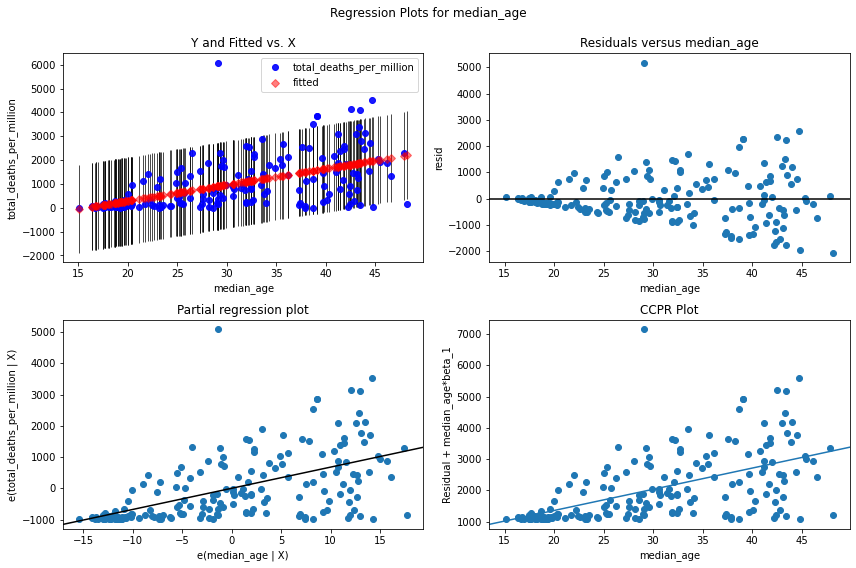

In [15]:
# and now the residual plot
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'median_age', fig=fig)

The plot in the top right is what we're looking for: residual versus fitted values. It shows a high degree of heteroskedasticity. This is bad news for model fit, as it essentially indicates that as median age increases, so does variance from the the predicted value. 

### Question 2
Now let's make a correlation matrix.


In [16]:
coma = df1.corr()
print(coma)

                                total_deaths_per_million  \
total_deaths_per_million                        1.000000   
total_vaccinations_per_hundred                 -0.041740   
median_age                                      0.560649   
gdp_per_capita                                  0.169500   

                                total_vaccinations_per_hundred  median_age  \
total_deaths_per_million                             -0.041740    0.560649   
total_vaccinations_per_hundred                        1.000000    0.620325   
median_age                                            0.620325    1.000000   
gdp_per_capita                                        0.669691    0.648799   

                                gdp_per_capita  
total_deaths_per_million              0.169500  
total_vaccinations_per_hundred        0.669691  
median_age                            0.648799  
gdp_per_capita                        1.000000  


That's kind of ugly and hard to interpret. Let's fix that.

In [17]:
import seaborn as sn

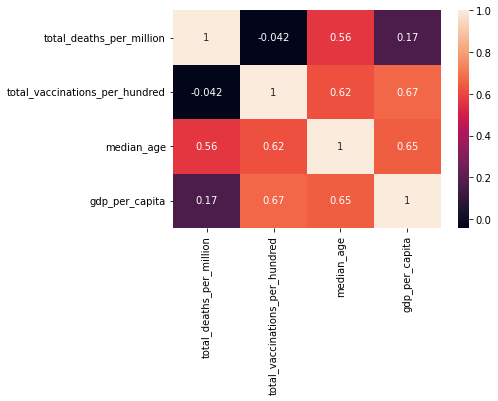

In [18]:
sn.heatmap(coma, annot=True)
plt.show()

Based on this, here are the relationships, from strongest to weakest:
1. GDP per Capita-Vaccination Rate
2. GDP per Capita-Median Age
3. Median Age-Vaccination Rate
4. Median Age-Total Deaths Rate
5. GDP per Capita-Death Rate
6. Vaccination Rate-Death Rate

So essentially:
1. Wealth has a strong positive association with a vaccination rate and median age. This means that greater wealth is associated with a higher vaccination rate and median age, and vice versa.
2. Median age is positively associated with vaccination rate, with wealth presumably acting as a confounding variable.
3. Wealth has a moderate positive association with a higher death rate, meaning that as wealth goes up, the death rate also rises, and vice versa.
4. Surprisingly, vaccination rate has an extremely weak _negative_ association with the death rate. I wonder what's going on there?